In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! pip install rasterio  -q -q -q
! pip install geopandas -q -q -q
! pip install matplotlib -q -q -q
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 15.2 MB/s eta 0:00:0000:0100:01


In [7]:
import sys
sys.path.append('../src')
from satellite_image import SatelliteImage
from utils import *
from plot_utils import *
from mappings import *

In [67]:
dep = num_dep_to_name_dep[str(973)].lower()
dep

NameError: name 'num_dep_to_name_dep' is not defined

In [5]:


import yaml
import re
import s3fs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import re
from pyproj import Transformer
from datetime import date



In [32]:

update_storage_access()

environment = get_environment()

root_path = get_root_path()

bucket = environment["bucket"]

path_s3_pleiades_data_2022_guyane = environment["sources"]["PLEIADES"][2022]["guyane"]
path_local_pleiades_data_2022_guyane = environment["local-path"]["PLEIADES"][2022]["guyane"]

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2022_guyane}",
        lpath=f"../{path_local_pleiades_data_2022_guyane}",
        recursive=True)


In [35]:
path_local_bdtopo_data = environment["local-path"]["BDTOPO"][2022]["guyane"]
path_s3_bdtopo_data = environment["sources"]["BDTOPO"][2022]["guyane"]

fs.download(
        rpath=f"{bucket}/{path_s3_bdtopo_data}",
        lpath=f"../{path_local_bdtopo_data}",
        recursive=True
)


In [13]:
filename = '../data/PLEIADES/2022/GUYANE/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')

In [14]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = '973'
    )

In [15]:
list_images = image.split(256)

In [16]:
list_images[0].normalize()

Text(0, 0.5, 'Pixels Lignes')

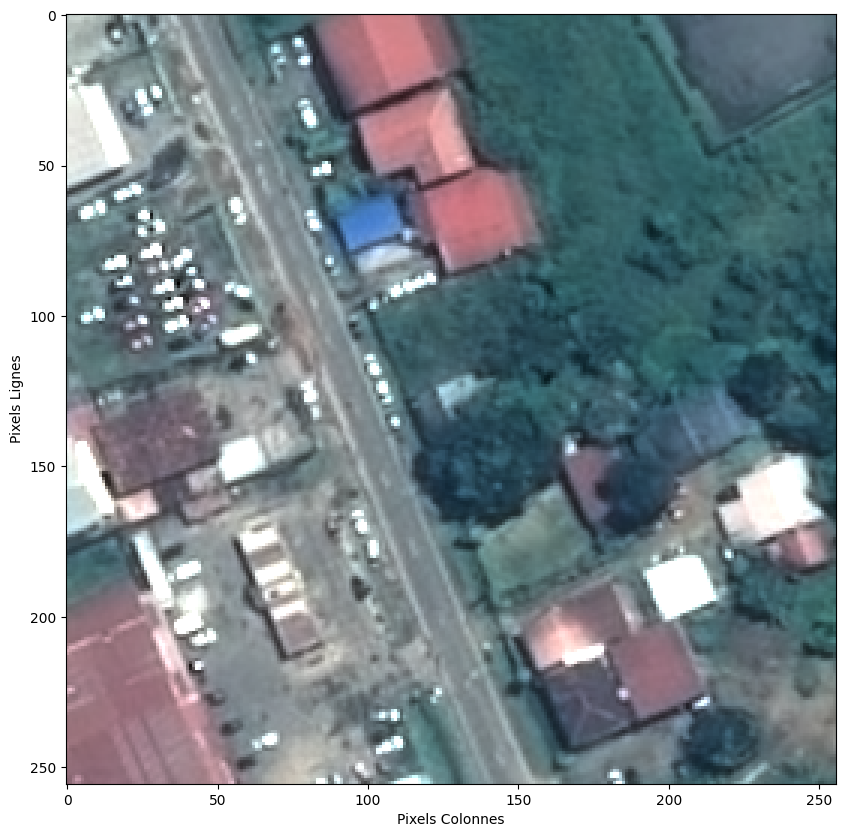

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(list_images[0].array, (1, 2, 0))[:,:,:3])
plt.xlabel('Pixels Colonnes')
plt.ylabel('Pixels Lignes')

In [19]:
from labeler import RILLabeler
from labeled_satellite_image import SegmentationLabeledSatelliteImage

labeler = RILLabeler(date, '973')

In [20]:
import rasterio
rasterio.coords.BoundingBox(10,10,10,11)

BoundingBox(left=10, bottom=10, right=10, top=11)

In [21]:
mask = labeler.create_segmentation_label(image)

Warning to remove

In [22]:
image.bounds

BoundingBox(left=353000.0, bottom=544000.0, right=354000.0, top=545000.0)

In [23]:
image.normalize()

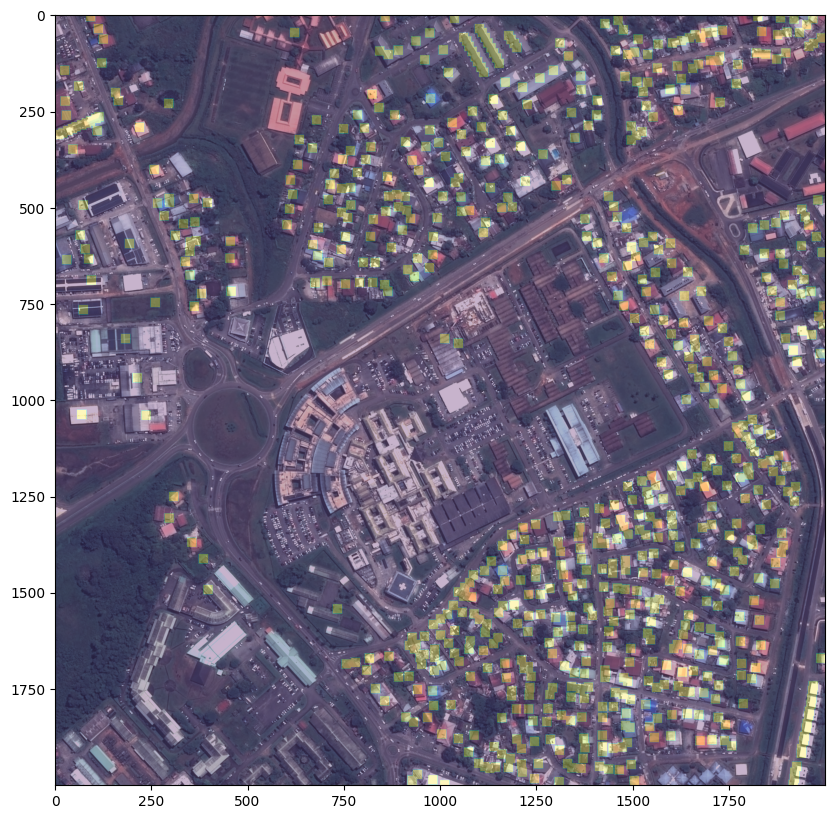

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image.array, (1, 2, 0))[:,:,:3])
ax.imshow(mask, alpha=0.3)

C'est le même résultat que dans le notebook de Clément

In [25]:
from labeled_satellite_image import DetectionLabeledSatelliteImage
label = labeler.create_detection_label(image)

In [15]:
len(label)

513

In [26]:
from shapely.geometry import box
import geopandas as gpd

boxes = []
for bounding_coordinates in label:
    boxes.append(box(*bounding_coordinates))
g = gpd.GeoSeries(boxes)
g

0      POLYGON ((105.000 0.000, 105.000 17.000, 80.00...
1      POLYGON ((125.000 23.000, 125.000 48.000, 100....
2      POLYGON ((635.000 33.000, 635.000 58.000, 610....
3      POLYGON ((138.000 50.000, 138.000 75.000, 113....
4      POLYGON ((134.000 112.000, 134.000 137.000, 10...
                             ...                        
508    POLYGON ((1685.000 1805.000, 1685.000 1830.000...
509    POLYGON ((1754.000 1812.000, 1754.000 1856.000...
510    POLYGON ((1719.000 1870.000, 1719.000 1895.000...
511    POLYGON ((1688.000 1872.000, 1688.000 1897.000...
512    POLYGON ((1770.000 1872.000, 1770.000 1911.000...
Length: 513, dtype: geometry

<Axes: >

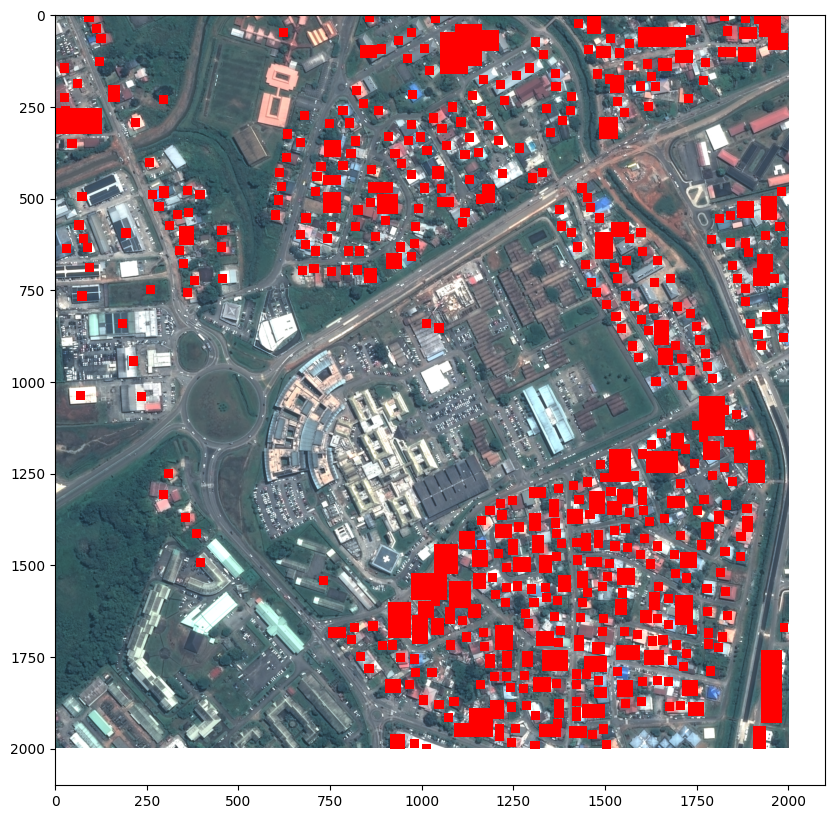

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image.array, (1, 2, 0))[:,:,:3])
g.plot(color="red", ax=ax)

BDTOPO

In [31]:
from labeler import BDTOPOLabeler

labeler = BDTOPOLabeler(date, '973')

ValueError: No valid `BATIMENT.shp` file found.

In [29]:
mask = labeler.create_segmentation_label(image)

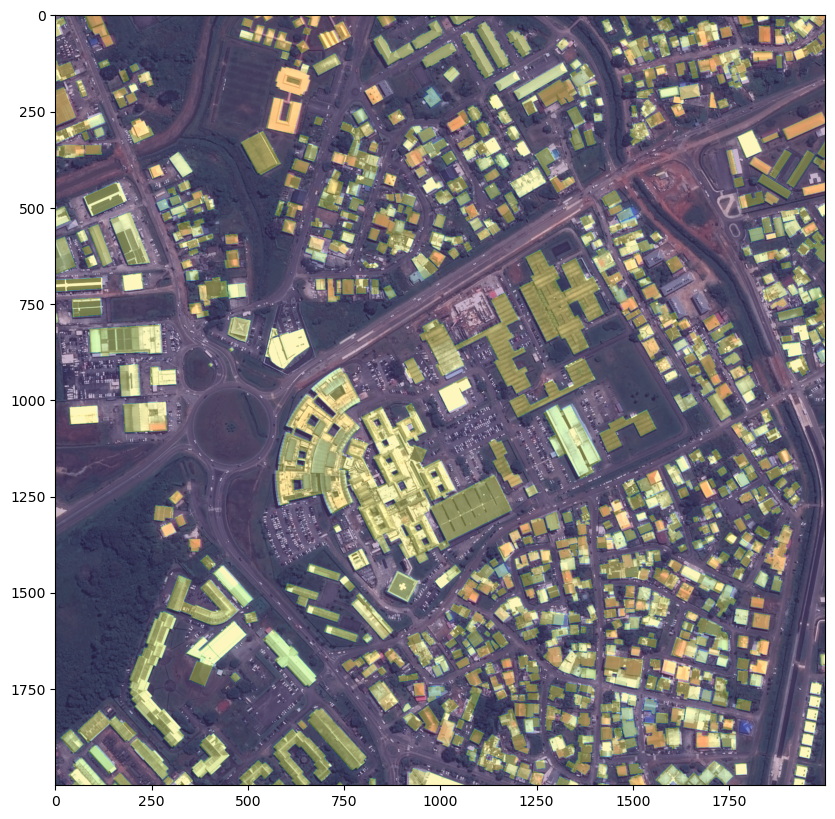

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image.array, (1, 2, 0))[:,:,:3])
ax.imshow(mask, alpha=0.3)

In [25]:
label = labeler.create_detection_label(image)

In [26]:
label

[(571.0, 0.0, 578.0, 3.0),
 (716.0, 0.0, 731.0, 7.0),
 (607.0, 0.0, 624.0, 8.0),
 (515.0, 0.0, 565.0, 18.0),
 (643.0, 0.0, 691.0, 33.0),
 (616.0, 5.0, 648.0, 35.0),
 (484.0, 7.0, 514.0, 34.0),
 (643.0, 31.0, 666.0, 53.0),
 (724.0, 16.0, 769.0, 69.0),
 (478.0, 25.0, 544.0, 74.0),
 (515.0, 49.0, 516.0, 51.0),
 (514.0, 53.0, 515.0, 54.0),
 (513.0, 56.0, 514.0, 57.0),
 (540.0, 34.0, 573.0, 83.0),
 (512.0, 59.0, 513.0, 60.0),
 (682.0, 39.0, 738.0, 90.0),
 (569.0, 42.0, 616.0, 96.0),
 (626.0, 65.0, 661.0, 100.0),
 (586.0, 94.0, 610.0, 117.0),
 (620.0, 115.0, 642.0, 135.0),
 (0.0, 5.0, 29.0, 58.0),
 (77.0, 0.0, 152.0, 84.0),
 (112.0, 114.0, 143.0, 140.0),
 (193.0, 125.0, 220.0, 150.0),
 (0.0, 118.0, 55.0, 173.0),
 (166.0, 140.0, 194.0, 176.0),
 (215.0, 145.0, 257.0, 187.0),
 (54.0, 168.0, 84.0, 214.0),
 (183.0, 177.0, 215.0, 232.0),
 (149.0, 187.0, 189.0, 242.0),
 (973.0, 0.0, 996.0, 8.0),
 (836.0, 0.0, 886.0, 32.0),
 (926.0, 13.0, 1006.0, 89.0),
 (827.0, 52.0, 934.0, 132.0),
 (953.0, 72.0, 1

In [27]:
len(label)

690

In [28]:
from shapely.geometry import box
import geopandas as gpd

boxes = []
for bounding_coordinates in label:
    boxes.append(box(*bounding_coordinates))
g = gpd.GeoSeries(boxes)
g

0      POLYGON ((578.000 0.000, 578.000 3.000, 571.00...
1      POLYGON ((731.000 0.000, 731.000 7.000, 716.00...
2      POLYGON ((624.000 0.000, 624.000 8.000, 607.00...
3      POLYGON ((565.000 0.000, 565.000 18.000, 515.0...
4      POLYGON ((691.000 0.000, 691.000 33.000, 643.0...
                             ...                        
685    POLYGON ((1270.000 1963.000, 1270.000 2000.000...
686    POLYGON ((1359.000 1978.000, 1359.000 2000.000...
687    POLYGON ((1335.000 1991.000, 1335.000 1992.000...
688    POLYGON ((1334.000 1993.000, 1334.000 1994.000...
689    POLYGON ((1333.000 1995.000, 1333.000 1996.000...
Length: 690, dtype: geometry

<AxesSubplot: >

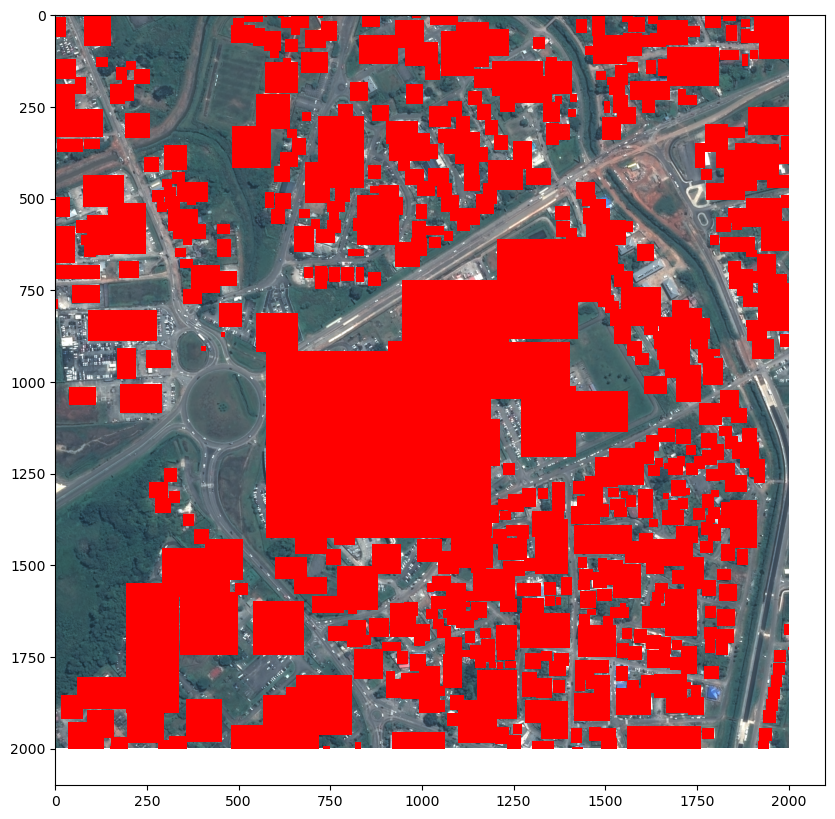

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image.array, (1, 2, 0))[:,:,:3])
g.plot(color="red", ax=ax)